In [1]:
!pip install pandas numpy seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 144.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 125.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
)
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


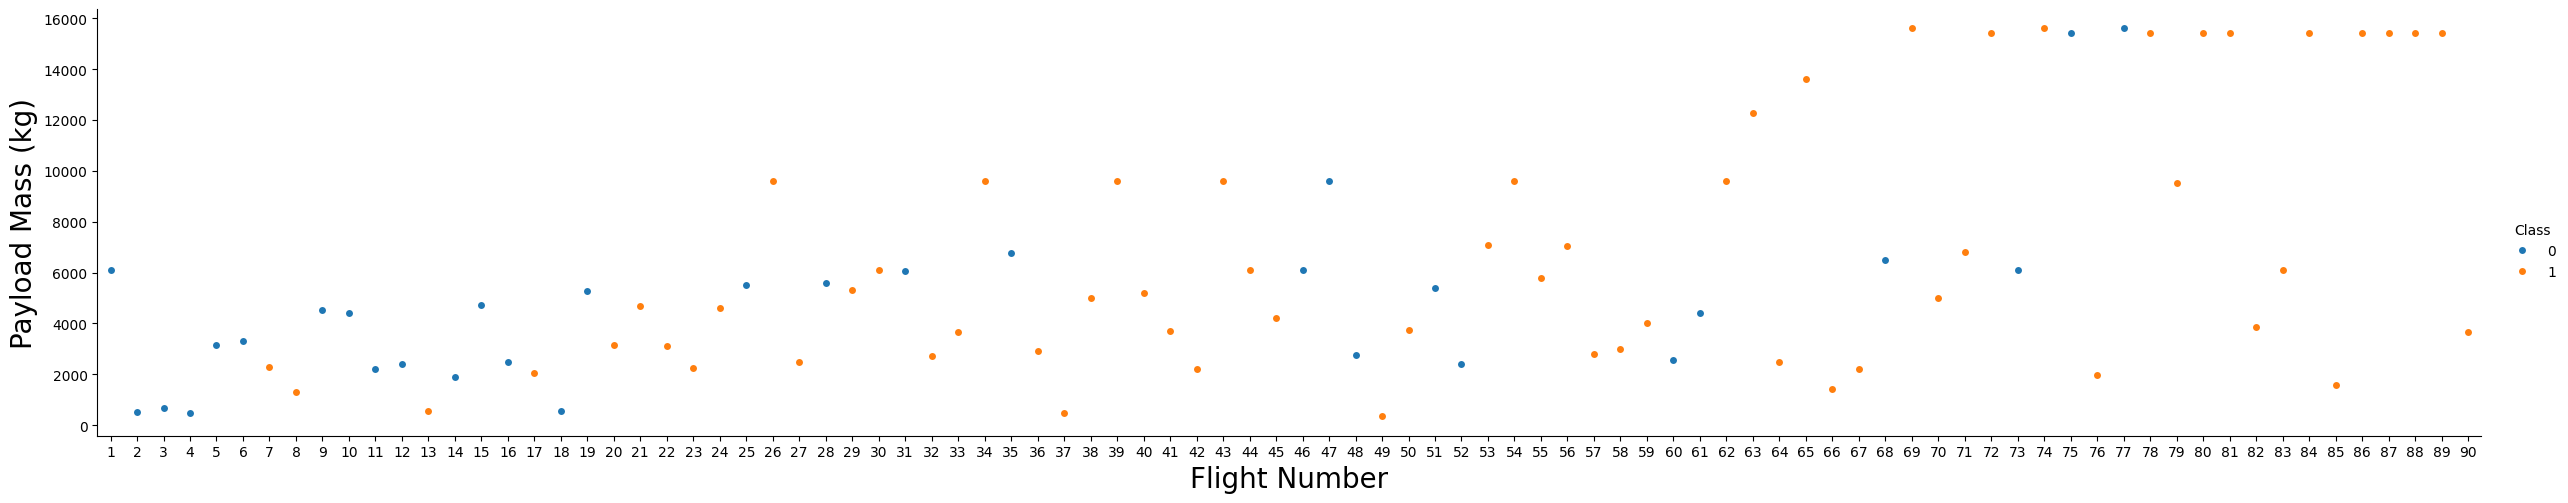

In [5]:
# FlightNumber vs PayloadMass scatter plot
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()


In [6]:
# Extract year from date
df['Year'] = df['Date'].apply(lambda x: int(x.split('-')[0]))
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [7]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site


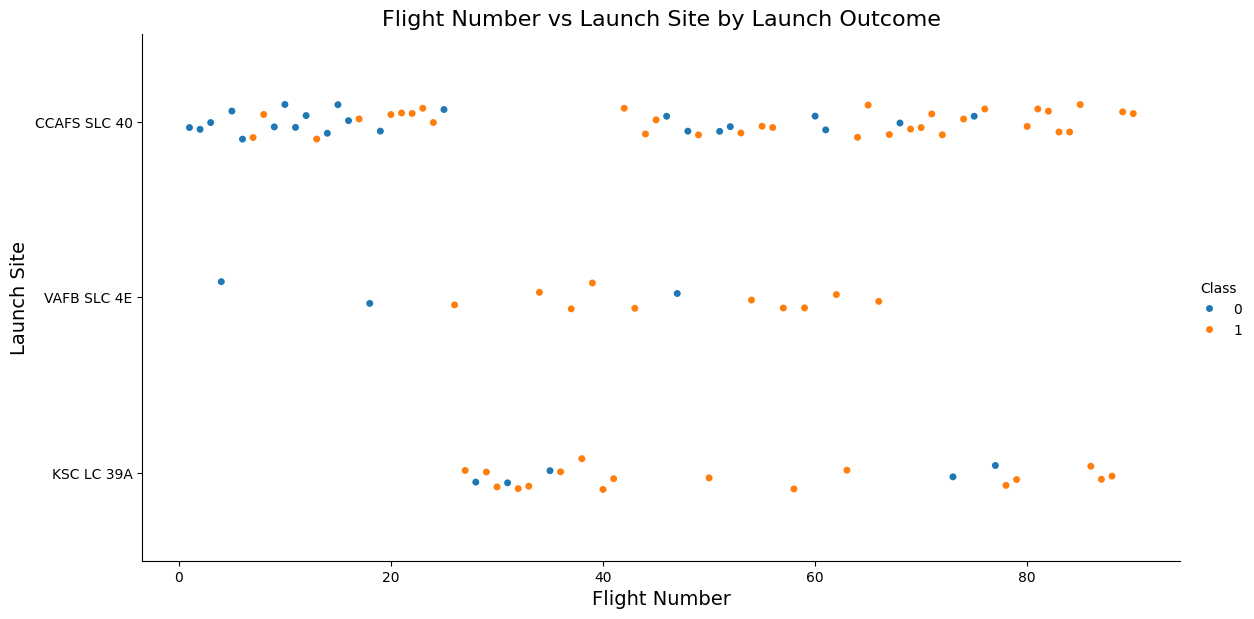

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Flight Number vs Launch Site, hue = Class
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",    # kind="strip" or "swarm" works well for categorical y
    aspect=2,        # widen the plot
    height=6
)

# Labels and title
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site by Launch Outcome", fontsize=16)
plt.show()


In [9]:
#Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Observations and Patterns 
Higher Flight Numbers → Higher Success Rate
Points with higher FlightNumber (later launches) are mostly colored green or 1, indicating successful landings.
This shows that as SpaceX gained experience, their first-stage landing success improved over time.
Launch Site Differences
CCAFS LC-40 (Cape Canaveral): Shows a mix of successes and failures, but later flights are mostly successful.
VAFB SLC-4E (Vandenberg): Fewer launches overall, but the pattern is similar—later flights are more successful.
KSC LC-39A (Kennedy Space Center): Success rates are very high for most flights.
Failures occur mostly in early flights
The first few launches from all sites often show failures (Class=0).
These failures decrease significantly as flight numbers increase—evidence of learning and technology improvement.
Clustering by Launch Site
The plot shows horizontal clusters for each launch site because LaunchSite is categorical.
Within each site, you can see the transition from failures to successes over time.
CoNclusion
Flight experience matters: The more launches SpaceX has done, the more likely a first-stage landing is successful.
All sites improve over time: No site consistently fails; early failures are mostly due to the learning curve.
KSC LC-39A appears more reliable in later launches.

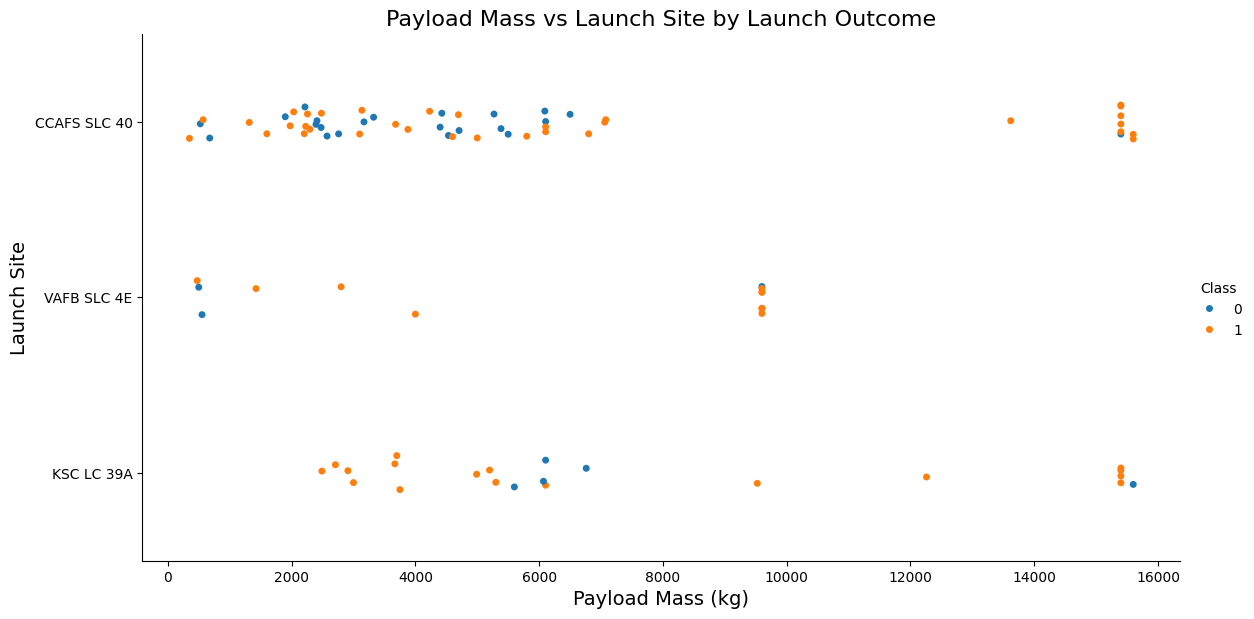

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Payload Mass vs Launch Site, colored by Class
sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",   # strip plot works well for categorical y-axis
    aspect=2,
    height=6,
    jitter=True     # adds slight horizontal spread to points to reduce overlap
)

# Labels and title
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Launch Outcome", fontsize=16)
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

In [13]:
### TASK  3: Visualize the relationship between success rate of each orbit type

/tmp/ipykernel_864/620378045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="Class", data=orbit_success, palette="Blues_d")


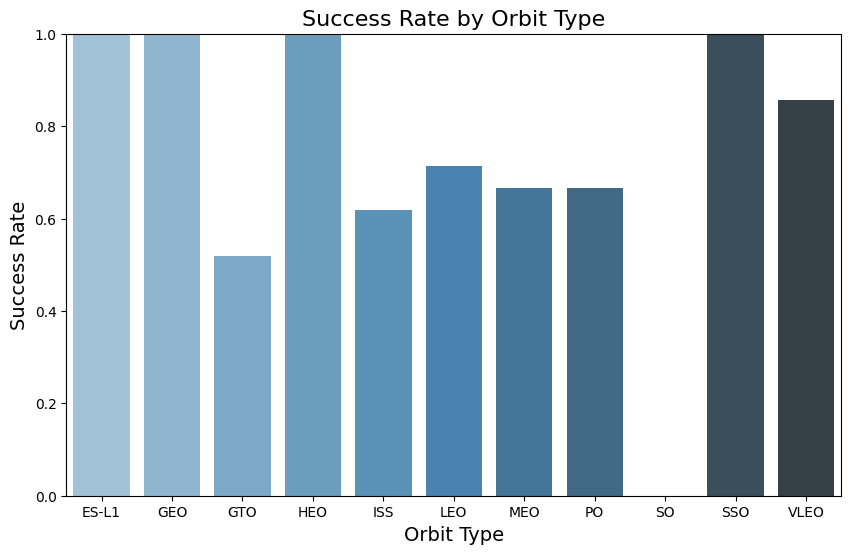

In [14]:
import matplotlib.pyplot as plt

# Group by Orbit and calculate the mean of Class (success rate)
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Plot a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Orbit", y="Class", data=orbit_success, palette="Blues_d")

plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.ylim(0, 1)  # Since success rate is between 0 and 1
plt.show()


In [16]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


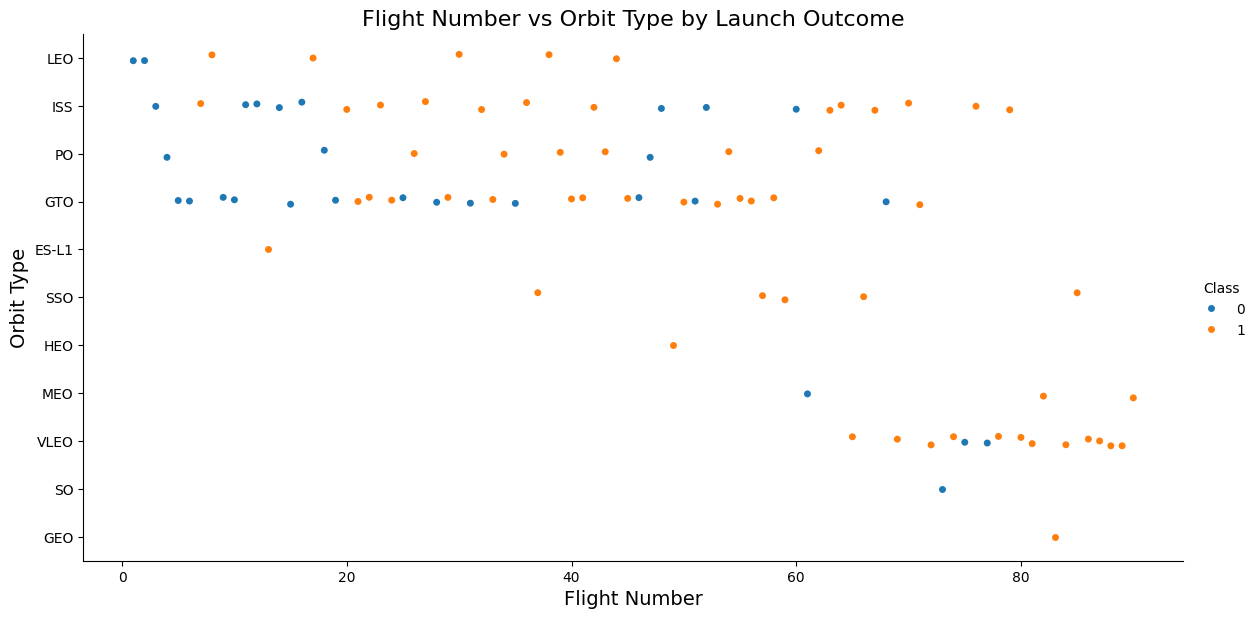

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Flight Number vs Orbit, colored by Class
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",  # strip plot works well for categorical y-axis
    aspect=2,
    height=6,
    jitter=True    # spreads points horizontally to reduce overlap
)

# Labels and title
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type by Launch Outcome", fontsize=16)
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

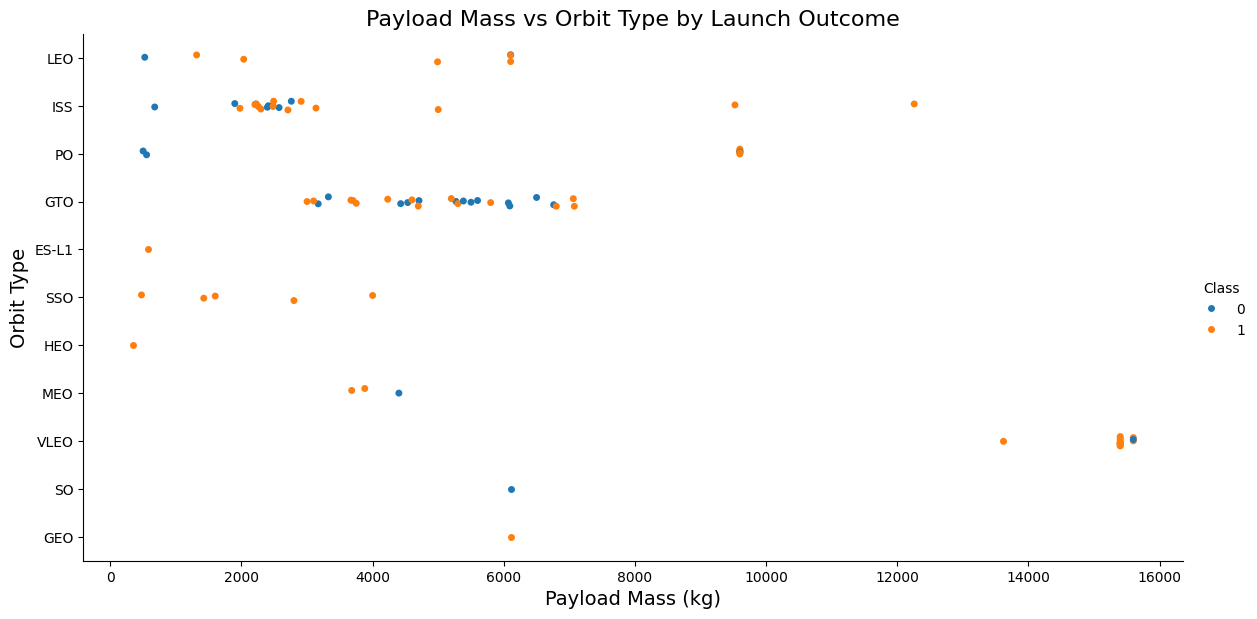

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Payload Mass vs Orbit, colored by Class
sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",   # strip plot for categorical y-axis
    aspect=2,
    height=6,
    jitter=True     # spread points horizontally to reduce overlap
)

# Labels and title
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type by Launch Outcome", fontsize=16)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

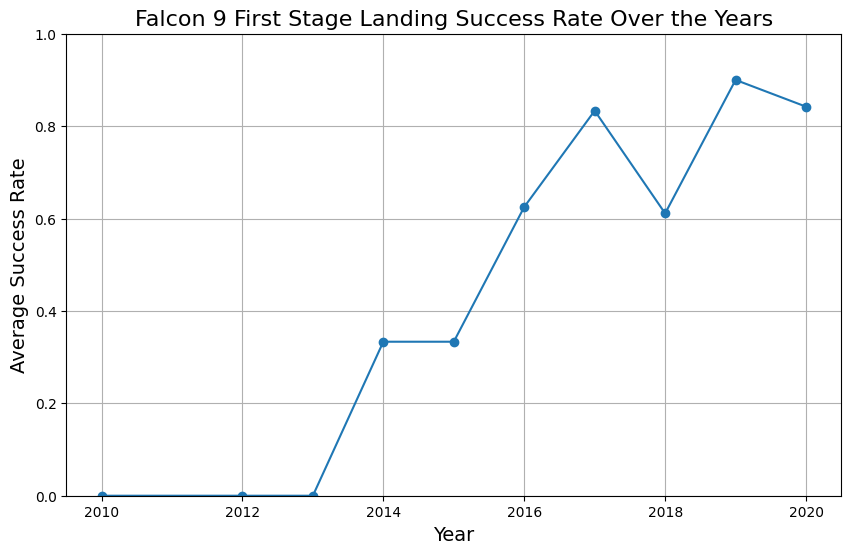

In [19]:
import matplotlib.pyplot as plt

# Extract Year from Date
df['Year'] = df['Date'].apply(lambda x: int(x.split('-')[0]))

# Group by Year and calculate mean success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10,6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linestyle='-')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Falcon 9 First Stage Landing Success Rate Over the Years", fontsize=16)
plt.ylim(0, 1)  # success rate between 0 and 1
plt.grid(True)
plt.show()


Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [21]:
# Select the features we want to use (numeric + categorical)
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 
               'Block', 'ReusedCount', 'Serial']]

# One-hot encode the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first 5 rows
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [22]:
# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display first 5 rows to verify
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range

In [24]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)